<a href="https://colab.research.google.com/github/VitorSancho/Estudos_FormacaoEstatisticaAlura/blob/main/Data_science_Introdu%C3%A7%C3%A3o_a_Testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

dados_tmdb=pd.read_csv("/content/drive/My Drive/tmdb_5000_movies.csv")


Mounted at /content/drive


In [ ]:
dados_tmdb.head(5)

In [ ]:
dados_tmdb.describe()

# Densidade de distribuição das notas médias do tmdb


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos tmdb 5000')

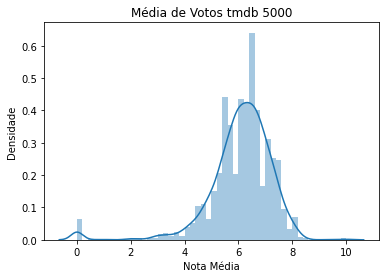

In [ ]:
ax=sns.distplot(dados_tmdb.vote_average)
ax.set(xlabel='Nota Média',ylabel="Densidade")
ax.set_title("Média de Votos tmdb 5000")

# Distribuição de frequencia das notas do tmdb

In [ ]:
ax=sns.distplot(dados_tmdb.vote_average,norm_hist=False,kde=False)
ax.set(xlabel='Nota Média',ylabel="Frequência")
ax.set_title("Média de Votos tmdb 5000")

In [ ]:
ax=sns.boxplot(dados_tmdb.vote_average)
ax.set(xlabel="Nota média")
ax.set_title("Distrtibuição de nota média ds filmes do tmdb 5000")

# Limpeza dos dados do TMDB

In [ ]:
dados_tmdb.query('vote_average==0').head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


Retirando os dados com poucos votos pois suas notas podem não refletir a realidade

In [ ]:
dados_tmdb_mais_de_10_votos=dados_tmdb.query('vote_count>=5')

In [ ]:
dados_tmdb_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.558000e+03,4558.000000,4558.000000,4.558000e+03,4557.000000,4558.000000,4558.000000
mean,3.056117e+07,51000.241773,22.630649,8.666175e+07,108.067369,6.200856,727.221808
std,4.125080e+07,81663.080690,32.269245,1.660373e+08,21.115367,0.918570,1256.701696
min,0.000000e+00,5.000000,0.001117,0.000000e+00,0.000000,1.900000,5.000000
25%,2.000000e+06,8811.000000,5.754700,0.000000e+00,94.000000,5.700000,71.000000
50%,1.540000e+07,13786.500000,14.181831,2.333176e+07,104.000000,6.300000,269.000000
75%,4.000000e+07,49518.500000,29.404666,9.843398e+07,118.000000,6.800000,796.750000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


# Distribuição de frequencia das notas do tmdb - dados tratados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos tmdb 5000 de filmes com mais de 10 votos')

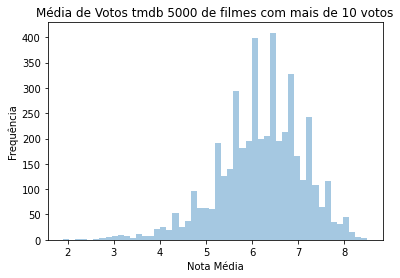

In [ ]:
ax=sns.distplot(dados_tmdb_mais_de_10_votos.vote_average,norm_hist=False,kde=False)
ax.set(xlabel='Nota Média',ylabel="Frequência")
ax.set_title("Média de Votos tmdb 5000 de filmes com mais de 10 votos")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrtibuição de nota média ds filmes do tmdb 5000 de filmes com mais de 10 votos')

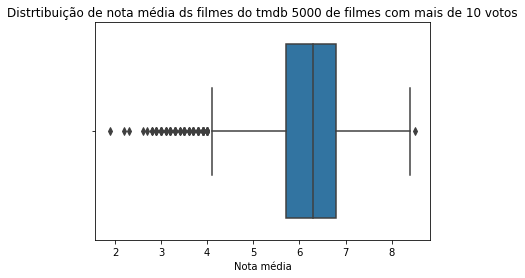

In [ ]:
ax=sns.boxplot(dados_tmdb_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média")
ax.set_title("Distrtibuição de nota média ds filmes do tmdb 5000 de filmes com mais de 10 votos")

# Densidade de distribuição das notas do tmdb - dados tratados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos tmdb 5000 de filmes com mais de 10 votos')

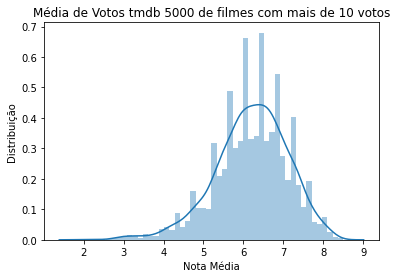

In [ ]:
ax=sns.distplot(dados_tmdb_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota Média',ylabel="Distribuição")
ax.set_title("Média de Votos tmdb 5000 de filmes com mais de 10 votos")

Testando a normalidade dos dados

In [ ]:
from scipy.stats import normaltest
stat_test,p_valor=normaltest(dados_tmdb_mais_de_10_votos.vote_average)
print(stat_test)
print(p_valor) # p_valor é muito baixo, ou seja, não pode-se afirmar que os dados se distribuem de maneira a respeitar a distribuição normal

262.1424436120601
1.1925912903829851e-57


# Explorando dados do Movie Lens

In [ ]:
notas=pd.read_csv("/content/drive/My Drive/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
medias_notas_por_filme=notas.groupby('movieId').rating.mean()
medias_notas_por_filme.reset_index

<bound method Series.reset_index of movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64>

# Densidade de distribuição das médias ds notas do movie lens

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos movie lens')

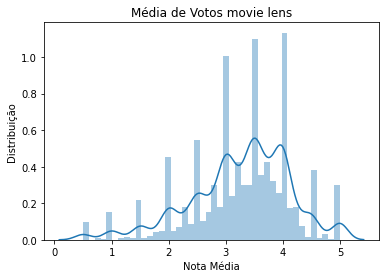

In [ ]:
ax=sns.distplot(medias_notas_por_filme)
ax.set(xlabel='Nota Média',ylabel="Distribuição")
ax.set_title("Média de Votos movie lens")

# Limpeza dos dados do movie lens

In [ ]:
quantidade_de_votos_por_filme=notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos=quantidade_de_votos_por_filme.query('rating>10').index

In [ ]:
nota_media_pelo_menos_10_votos=medias_notas_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_pelo_menos_10_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2121, dtype: float64

# Distribuição das medias dos filmes do movie lens -> dados tratados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos movie lens de filmes com pelo menos 10 votos')

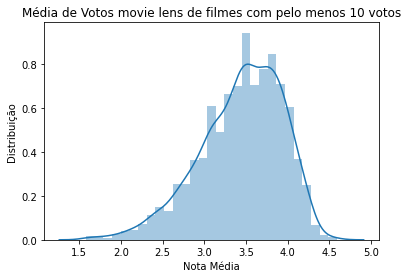

In [ ]:
ax=sns.distplot(nota_media_pelo_menos_10_votos)
ax.set(xlabel='Nota Média',ylabel="Distribuição")
ax.set_title("Média de Votos movie lens de filmes com pelo menos 10 votos")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrtibuição de nota média ds filmes do movie lens de filmes com mais de 10 votos')

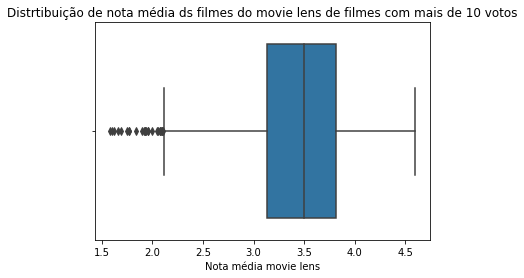

In [ ]:
ax=sns.boxplot(nota_media_pelo_menos_10_votos)
ax.set(xlabel="Nota média movie lens")
ax.set_title("Distrtibuição de nota média ds filmes do movie lens de filmes com mais de 10 votos")

# Distribuição acumulada da nota média dos filmes do movie lens

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de Votos movie lens de filmes com pelo menos 10 votos')

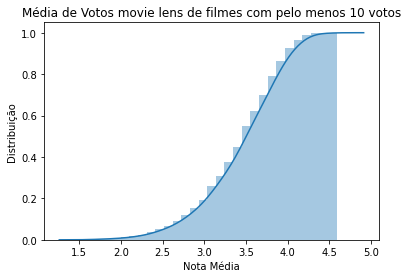

In [ ]:
ax=sns.distplot(nota_media_pelo_menos_10_votos,hist_kws={'cumulative':True},
                                            kde_kws={'cumulative':True})
ax.set(xlabel='Nota Média',ylabel="Distribuição")
ax.set_title("Média de Votos movie lens de filmes com pelo menos 10 votos")

In [ ]:
dados_tmdb_mais_de_10_votos.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4558, dtype: int64

# Densidade de distribuição do total de votos por filme do TMDB

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Nº de votos de filmes do tmdb com pelo menos 10 votos')

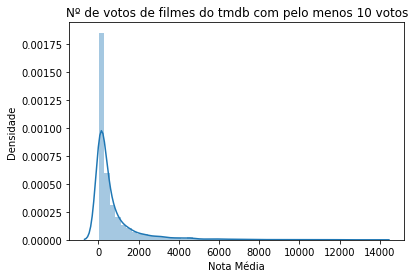

In [ ]:
ax=sns.distplot(dados_tmdb_mais_de_10_votos.vote_count)
ax.set(xlabel='Nota Média',ylabel="Densidade")
ax.set_title("Nº de votos de filmes do tmdb com pelo menos 10 votos")

# Densidade de distribuição do orçamentos dos filmes do TMDB

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Orçamento dos filmes')

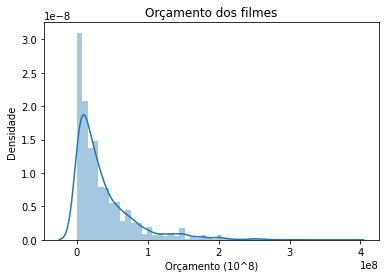

In [ ]:
ax=sns.distplot(dados_tmdb.query('budget>0').budget)
ax.set(xlabel='Orçamento (10^8)',ylabel="Densidade")
ax.set_title("Orçamento dos filmes")

# Densidade de distribuição popularidade dos filmes do TMDB

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade dos filmes')

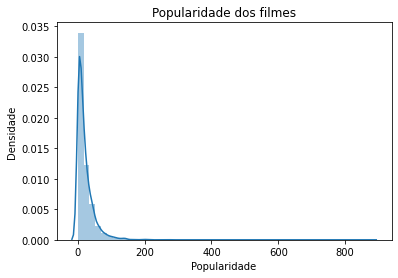

In [ ]:
ax=sns.distplot(dados_tmdb.popularity)
ax.set(xlabel='Popularidade',ylabel="Densidade")
ax.set_title("Popularidade dos filmes")

# Densidade de distribuição do tempo de duração dos filmes do TMDB

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duração dos filmes')

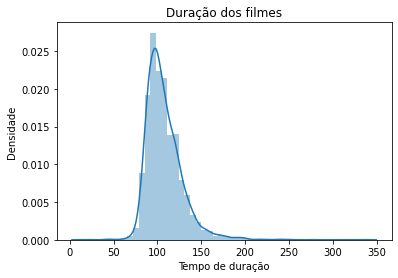

In [ ]:
# dados_tmdb.runtime.isnull()
dados_runtime_tratedos=dados_tmdb.query('runtime>0').runtime.dropna()
ax=sns.distplot(dados_runtime_tratedos)
ax.set(xlabel='Tempo de duração',ylabel="Densidade")
ax.set_title("Duração dos filmes")

# Discussão sobre teorema do limite central e utilização do teste-t

In [ ]:
#média dos votos dos filmes com pelo menos 10 votos
nota_media_pelo_menos_10_votos.mean()

3.4438105717465843

In [ ]:
from scipy.stats import normaltest
stat_test,p_valor=normaltest(nota_media_pelo_menos_10_votos)
print(stat_test)
print(p_valor) # p_valor é muito baixo, ou seja, não pode-se afirmar que os dados se distribuem de maneira a respeitar a distribuição normal

136.27131503713488
2.5648378782227156e-30


In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_pelo_menos_10_votos)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(3.422668132218516, 3.464953011274652)

O mais certo é construir instervalo de confiança utilizando o ttest, uma vez que a amostra não se distribui de maneira normal

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
descr_todos_com_10_votos=DescrStatsW(nota_media_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.4226560546570113, 3.4649650888361565)

 Visualizando dados

In [ ]:
filmes=pd.read_csv("/content/drive/My Drive/movies.csv")
filmes.head()

In [ ]:
notas_toy_story=notas.query('movieId==1')
notas_toy_story.head()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição notas Toy Story')

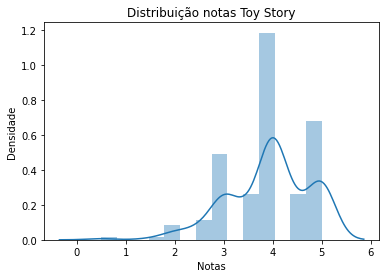

In [ ]:
ax=sns.distplot(notas_toy_story.rating)
ax.set(xlabel='Notas',ylabel="Densidade")
ax.set_title("Distribuição notas Toy Story")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição das notas Toy Story')

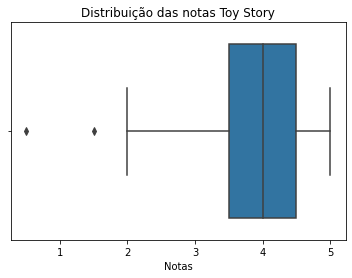

In [ ]:
ax=sns.boxplot(notas_toy_story.rating)
ax.set(xlabel="Notas")
ax.set_title("Distribuição das notas Toy Story")

 Comparando médias e testando o teorema do limte central

In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(notas_toy_story.rating)

(3.8093359183563402, 4.032524546759939)

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(notas_toy_story.rating, value=3.4438105717465843)

# como p_value é menor que 0.05, descartamos a possibilidade da amostra de filmes de toy story
# ter a mesma média de todos os film

(8.379793882827906, 5.3020470490105326e-17)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/weightstats.py:1373: RuntimeWarning: invalid value encountered in double_scalars
  var_pooled = x1_var / (nobs1 - ddof)


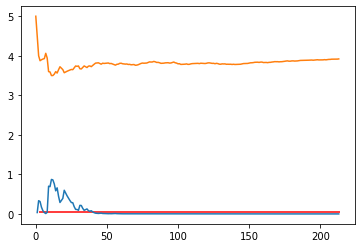

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(75241)
temp=notas_toy_story.sample(frac=1).rating

def calcula_teste(i):
  media=temp[0:i].mean()
  _,p_valor=ztest(temp[0:i], value=3.4438105717465843)
  return (media,p_valor)

medias=np.array([calcula_teste(i) for i in range(1,len(temp))])

df=pd.DataFrame(medias)
df
plt.plot(df.index,df[1])
plt.plot(df.index,df[0])
plt.hlines(y=0.05,xmin=2,xmax=df.shape[0],colors='r')
#Insights
# caso tivesse pegado uma a amostra pequena, p_valor daria pequeno e eu poderia assumir
# um dado de média errado
# ou seja, para amostras pequenas, poderia-se afirmar que as médias são similares

# ao coletar mais amostras, vemos que o p_valor diminui
# a média de aproxima da média da população
# assim, descartamos a hipotese das médias serem similares


Os dados de médias só assumem distribuição nomal a partir da amostragem de número 160

In [ ]:
from scipy.stats import normaltest
stat_test,p_valor=normaltest(df[0].loc[161:])
print(stat_test)
print(p_valor)
print(p_valor>0.05)

5.980475452767454
0.05027548349396799
True


## Estabelecendo intervalo de confiança a partir de uma média

In [ ]:
_,p_valor=ztest(notas_toy_story.rating,notas.rating)
print(p_valor)
zconfint(notas_toy_story.rating,notas.rating)
# print(medias_notas_por_filme)
# toy story tem uma média entre 0.27 vezes a media das notas e 0.55 vezes a media das notas

3.762112778881965e-09


(0.2799245129192442, 0.5588219849631111)

## Comparando as médias

In [ ]:
descr_todas_as_notas=DescrStatsW(notas.rating)
descr_toystory=DescrStatsW(notas_toy_story.rating)
comparacao=descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [ ]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das notas dos filmes')

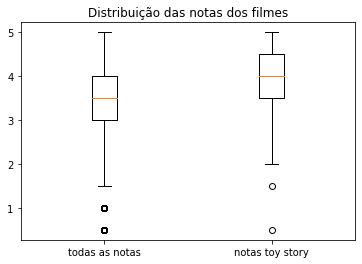

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating,notas_toy_story.rating],
            labels=["todas as notas","notas toy story"])
plt.title("Distribuição das notas dos filmes")


Mais uma vez demonstrando a importancia do tamanho da amostra.
Ao fatiar os dados das notas do toy story, trazendo assim somente 9 dados, poderíamos nos confundir em achar que as médias são compraráveis.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


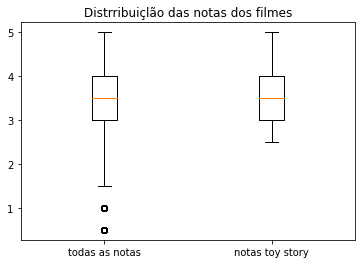

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating,notas_toy_story[3:12].rating],
            labels=["todas as notas","notas toy story"])
plt.title("Distrribuiçlão das notas dos filmes")

In [ ]:
descr_fatia_toystory=DescrStatsW(notas_toy_story[3:12].rating)
comparacao=descr_todas_as_notas.get_compare(descr_fatia_toystory)
df=pd.DataFrame(comparacao.summary())
print(df[4].loc[1])


 0.877


In [ ]:
filmes.query("movieId in [1,593,72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distrribuiçlão das notas dos filmes')

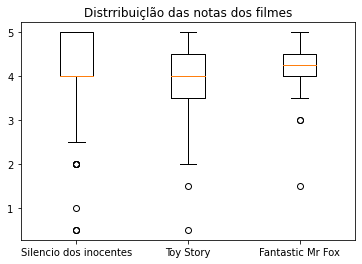

In [ ]:
notas593=notas.query("movieId==593")
notas1=notas.query("movieId==1")
notas72226=notas.query("movieId==72226")

import matplotlib.pyplot as plt

plt.boxplot([notas593.rating,notas1.rating,notas72226.rating],
            labels=["Silencio dos inocentes","Toy Story","Fantastic Mr Fox"])
plt.title("Distrribuiçlão das notas dos filmes")

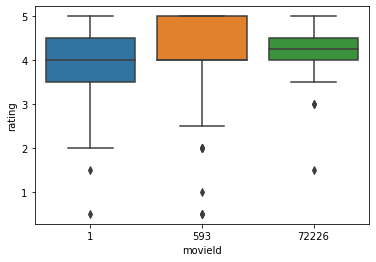

In [ ]:
import seaborn as sns

sns.boxplot(x="movieId",y="rating",data=notas.query("movieId in (1,593,72226)"))

In [ ]:
descr_1=DescrStatsW(notas1.rating)
descr_593=DescrStatsW(notas593.rating)
comparacao=descr_1.get_compare(descr_593)
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [ ]:
descr_72226=DescrStatsW(notas72226.rating)
descr_593=DescrStatsW(notas593.rating)
comparacao=descr_72226.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [ ]:
comparacao=descr_72226.get_compare(descr_1)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


In [ ]:
from scipy.stats import ranksums

ranksums(notas1.rating,notas593.rating)
#ranksums é muito utilizado para conferir se um conjunto de dados possui 
# dados maiores que o outro...

# muito utilizado para conjunto de dados de notas

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)